In [2]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

In [3]:
X = np.array([[1, 50], [1, 60], [1, 70], [1, 100]])
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [4]:
Y = np.array([[10], [15], [40], [45]])
Y

array([[10],
       [15],
       [40],
       [45]])

In [5]:
X_T_X = (X.T).dot(X) #transponted
X_T_X_inverted = inv(X_T_X) #inverted
w = X_T_X_inverted.dot(X.T).dot(Y) # ((X^T*X)^-1)X^T*Y
print("w_1=%.5f, w_2=%.3f" % (w[0][0], w[1][0]))

w_1=-22.50000, w_2=0.714


In [6]:
w = inv(
    (X.T).dot(X)
).dot(X.T).dot(Y)
print("w_1=%.5f, w_2=%.3f" % (w[0][0], w[1][0]))

w_1=-22.50000, w_2=0.714


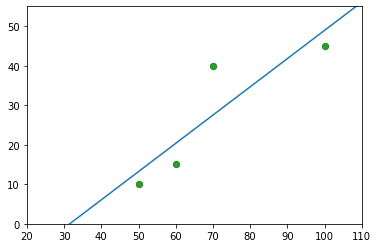

In [7]:
%matplotlib inline

# axis borders
margin = 10
X_min = X[:, 1].min() - 30
X_max = X[:, 1].max() + margin

# dots for painting line
X_support = np.linspace(X_min, X_max, num=100) #linspace генерирует последовательность точек между x_min и x_max кол-вом num
# предсказания модели
Y_model = w[0][0] + w[1][0] * X_support

plt.xlim(X_min, X_max)
plt.ylim(0, Y[:, 0].max() + margin)

plt.scatter(X[:, 1], Y[:, 0], 40, 'g', 'o', alpha=0.8)

plt.plot(X_support, Y_model)

plt.show()

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston_dataset = load_boston()

In [10]:
features = boston_dataset.data

In [11]:
y = boston_dataset.target

In [12]:
w = inv(
    (features.T).dot(features)
).dot(features.T).dot(y)
w

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [13]:
def ndprint(a, format_string = '{0:.2f}'):
    return [format_string.format(v, i) for i, v in enumerate(a)]

In [14]:
print('Коэффициенты: \n%s' % ndprint(w))

Коэффициенты: 
['-0.09', '0.05', '-0.00', '2.85', '-2.87', '5.93', '-0.01', '-0.97', '0.17', '-0.01', '-0.39', '0.01', '-0.42']


In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(features, y)

In [16]:
print('Коэффициенты: \n%s' % ndprint(reg.coef_))

Коэффициенты: 
['-0.11', '0.05', '0.02', '2.69', '-17.77', '3.81', '0.00', '-1.48', '0.31', '-0.01', '-0.95', '0.01', '-0.52']


In [17]:
y_pred = reg.predict(features)
y_true = y

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
print('MAE = %s' % mean_absolute_error(y_true, y_pred))
print('MSE = %s' % mean_squared_error(y_true, y_pred))

MAE = 3.2708628109003115
MSE = 21.894831181729202


In [20]:
y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])


In [21]:
e = y_true_ - y_pred_
e_sqrt = (y_true_ - y_pred_) * (y_true_ - y_pred_)

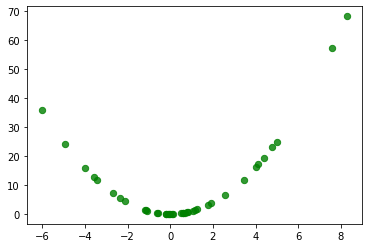

In [22]:
plt.scatter(e, e_sqrt, 40, 'g', 'o', alpha=0.8)

plt.show()

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

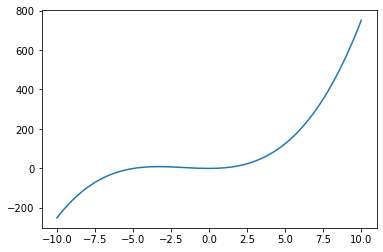

In [24]:
x = np.linspace(-10, 10, num=100)
y = x

plt.plot(x, 0.5*x*x*x + 2.5*x*x + 0.1*x)

plt.show()

In [25]:
data = pd.read_csv('3.10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


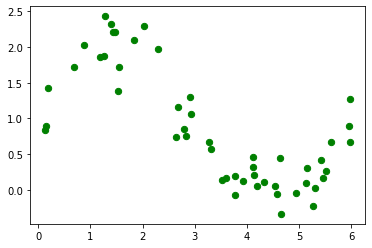

In [26]:
margin = 0.3

plt.scatter(data.x_train, data.y_train, 40, 'g', 'o')

plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression().fit(data[['x_train']], data.y_train)

In [29]:
y_hat = reg.predict(data[['x_train']])

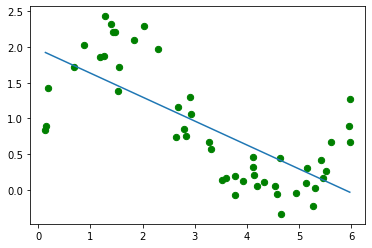

In [30]:
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o')
plt.plot(data.x_train, y_hat)

plt.show()

In [31]:
def generate_degrees(source_data: list, degree: int):
    return np.array([
        source_data**n for n in range(1, degree + 1)
    ]).T

In [32]:
degree = 5

x = generate_degrees(data['x_train'], degree)
x.shape

(50, 5)

In [33]:
def train_polynomial(degree, data):
    
    X = generate_degrees(data['x_train'], degree)
    
    model = LinearRegression().fit(X, data.y_train)
    y_pred = model.predict(X)
    
    error = r2_score(data['y_train'], y_pred)
    print('Степень полинома %d Ошибка %.3f' % (degree, error))
    
    plt.scatter(data.x_train, data.y_train, 40, 'g', 'o')
    plt.plot(data.x_train, y_pred)
    
    plt.show()

Степень полинома 1 Ошибка 0.519


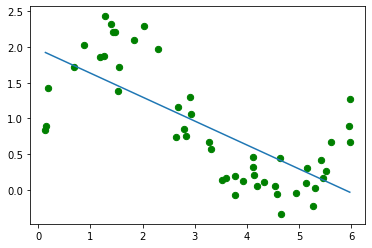

Степень полинома 2 Ошибка 0.533


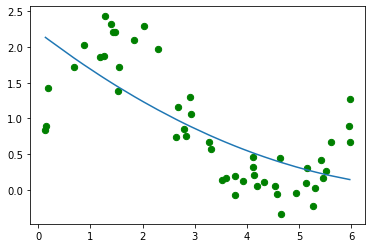

Степень полинома 3 Ошибка 0.888


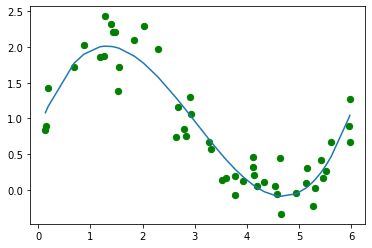

Степень полинома 4 Ошибка 0.895


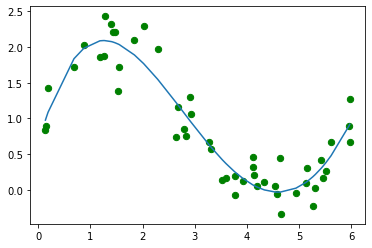

Степень полинома 5 Ошибка 0.896


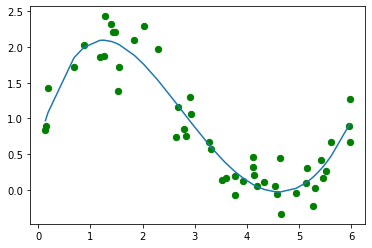

Степень полинома 6 Ошибка 0.899


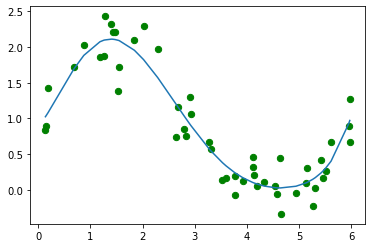

Степень полинома 7 Ошибка 0.900


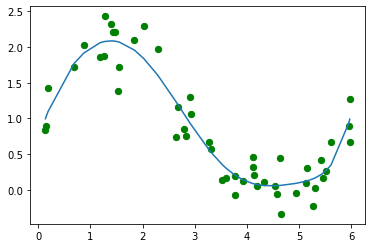

Степень полинома 8 Ошибка 0.909


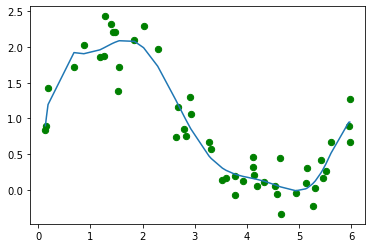

Степень полинома 9 Ошибка 0.909


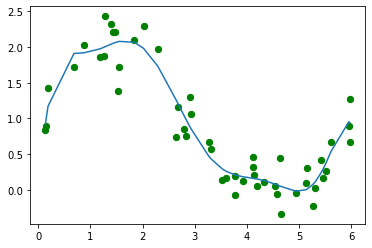

Степень полинома 10 Ошибка 0.909


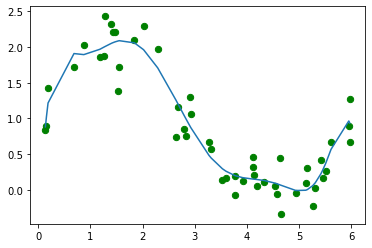

In [34]:
for i in range(1, 11):
    train_polynomial(i, data)

In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [36]:
boston_dataset = load_boston()

In [37]:
X = boston_dataset.data
y = boston_dataset.target

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2)

In [41]:
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_valid)
error = r2_score(y_valid, y_pred)
error

0.7789207451814428